# Import Library

In [ ]:
import pandas as pd

# Read Data

In [ ]:
df = pd.read_csv('/content/ecommerce_customer_data_custom_ratios.csv')

# Sanity Check

In [ ]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


# Drop columns

In [ ]:
df = df.drop(['Customer ID', 'Purchase Date', 'Returns', 'Customer Name', 'Age'], axis=1)
df.head()

,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Gender,Churn
0,Electronics,12,3,740,Credit Card,37,Male,0
1,Home,468,4,2739,PayPal,37,Male,0
2,Home,288,2,3196,PayPal,37,Male,0
3,Clothing,196,1,3509,PayPal,37,Male,0
4,Home,449,1,3452,Credit Card,49,Female,1


# One Hote Key Categorical Columns

In [ ]:
# One-hot encode 'Product Category'
product_category_dummies = pd.get_dummies(df['Product Category'], prefix='Product')
df = pd.concat([df, product_category_dummies], axis=1)
df = df.drop('Product Category', axis=1)

# One-hot encode 'Payment Method'
payment_method_dummies = pd.get_dummies(df['Payment Method'], prefix='Payment')
df = pd.concat([df, payment_method_dummies], axis=1)
df = df.drop('Payment Method', axis=1)

# One-hot encode 'Gender'
gender_dummies = pd.get_dummies(df['Gender'], prefix='Gender')
df = pd.concat([df, gender_dummies], axis=1)
df = df.drop('Gender', axis=1)

# Replace True/False with 0/1
df = df.replace({True: 1, False: 0})

df.head()


<ipython-input-39-fc9da993362b>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


,Product Price,Quantity,Total Purchase Amount,Customer Age,Churn,Product_Books,Product_Clothing,Product_Electronics,Product_Home,Payment_Cash,Payment_Credit Card,Payment_Crypto,Payment_PayPal,Gender_Female,Gender_Male
0,12,3,740,37,0,0,0,1,0,0,1,0,0,0,1
1,468,4,2739,37,0,0,0,0,1,0,0,0,1,0,1
2,288,2,3196,37,0,0,0,0,1,0,0,0,1,0,1
3,196,1,3509,37,0,0,1,0,0,0,0,0,1,0,1
4,449,1,3452,49,1,0,0,0,1,0,1,0,0,1,0


# Drop Outliers with IQR Method

In [ ]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_filtered

initial_rows = len(df)

df = remove_outliers(df, 'Product Price')
df = remove_outliers(df, 'Quantity')
df = remove_outliers(df, 'Total Purchase Amount')


dropped_rows = initial_rows - len(df)
print(f"Number of rows dropped due to outliers: {dropped_rows}")

df.head()


Number of rows dropped due to outliers: 0


,Product Price,Quantity,Total Purchase Amount,Customer Age,Churn,Product_Books,Product_Clothing,Product_Electronics,Product_Home,Payment_Cash,Payment_Credit Card,Payment_Crypto,Payment_PayPal,Gender_Female,Gender_Male
0,12,3,740,37,0,0,0,1,0,0,1,0,0,0,1
1,468,4,2739,37,0,0,0,0,1,0,0,0,1,0,1
2,288,2,3196,37,0,0,0,0,1,0,0,0,1,0,1
3,196,1,3509,37,0,0,1,0,0,0,0,0,1,0,1
4,449,1,3452,49,1,0,0,0,1,0,1,0,0,1,0


# Logistical Transformation for Numerical Columns

In [ ]:
# Log transformation for 'Product Price', 'Quantity', and 'Total Purchase Amount'
for col in ['Product Price', 'Quantity', 'Total Purchase Amount']:
    # Add 1 to avoid log(0) errors
    df[col] = np.log1p(df[col])

df.head()


,Product Price,Quantity,Total Purchase Amount,Customer Age,Churn,Product_Books,Product_Clothing,Product_Electronics,Product_Home,Payment_Cash,Payment_Credit Card,Payment_Crypto,Payment_PayPal,Gender_Female,Gender_Male
0,2.564949,1.386294,6.608001,37,0,0,0,1,0,0,1,0,0,0,1
1,6.150603,1.609438,7.915713,37,0,0,0,0,1,0,0,0,1,0,1
2,5.666427,1.098612,8.069968,37,0,0,0,0,1,0,0,0,1,0,1
3,5.283204,0.693147,8.163371,37,0,0,1,0,0,0,0,0,1,0,1
4,6.109248,0.693147,8.146999,49,1,0,0,0,1,0,1,0,0,1,0


# Churn Prediction and Confusion Matrix

Cross-validation scores: [0.79996858 0.7997621  0.79978455 0.79996409 0.7997621 ]
Mean cross-validation score: 0.799848284361244


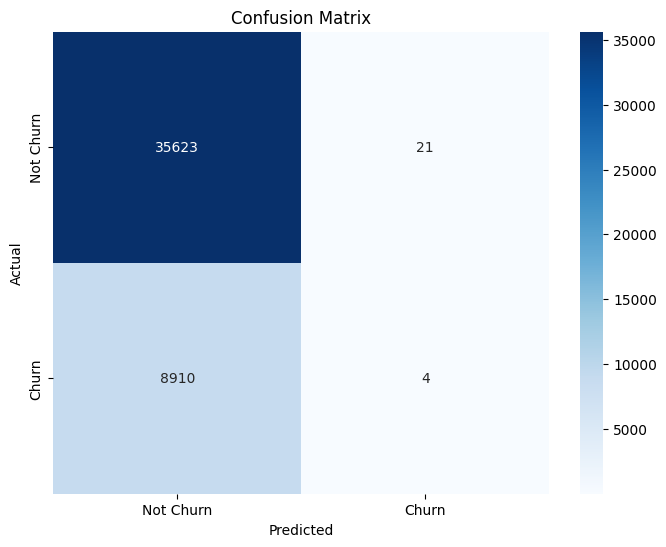

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your preprocessed DataFrame from the previous code
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)


# Cross-validation
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# OLS to know probability of churn based on coefficient

In [ ]:
import statsmodels.api as sm

# Assuming 'X_train' and 'y_train' are defined from your previous code
# Add a constant to the independent variables
X_train_with_constant = sm.add_constant(X_train)

# Fit the OLS model
model = sm.OLS(y_train, X_train_with_constant)
results = model.fit()

# Print the model summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.619
Date:                Sat, 03 May 2025   Prob (F-statistic):            0.00243
Time:                        22:37:55   Log-Likelihood:                -89463.
No. Observations:              178228   AIC:                         1.790e+05
Df Residuals:                  178216   BIC:                         1.791e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.10